In [103]:
# Importing Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

import warnings
warnings.filterwarnings("ignore")


In [32]:
# Load dataset.
creditCFD = pd.read_csv("C:/Users/sravy/OneDrive/Documents/MSISOM/Sample Practice  Proj/creditcard.csv")
creditCFD.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
# Analyzing the data

print("Credit Card Fraud Detection data -  rows:", creditCFD.shape[0]," columns:",  creditCFD.shape)
 

Credit Card Fraud Detection data -  rows: 284807  columns: (284807, 31)


In [80]:
creditCFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [34]:
creditCFD.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## We can see from the Time feature that the data contains 284,807 transactions over 2 days (or 172792 seconds) in a row.

In [38]:
#Check missing data
#creditCFD.isnull().sum() .....to check the total missing values
# To check null values present or not.
creditCFD.isnull().values.any() 

# To get in table format:
#total = creditCFD.isnull().sum().sort_values(ascending = False)
#percent = (creditCFD.isnull().sum()/creditCFD.isnull().count()*100).sort_values(ascending = False)
#pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()


False

## We can see that there is no data is missing from the data set.

In [50]:
# Checking the options in Class column
creditCFD['Class'].unique()


array([0, 1], dtype=int64)

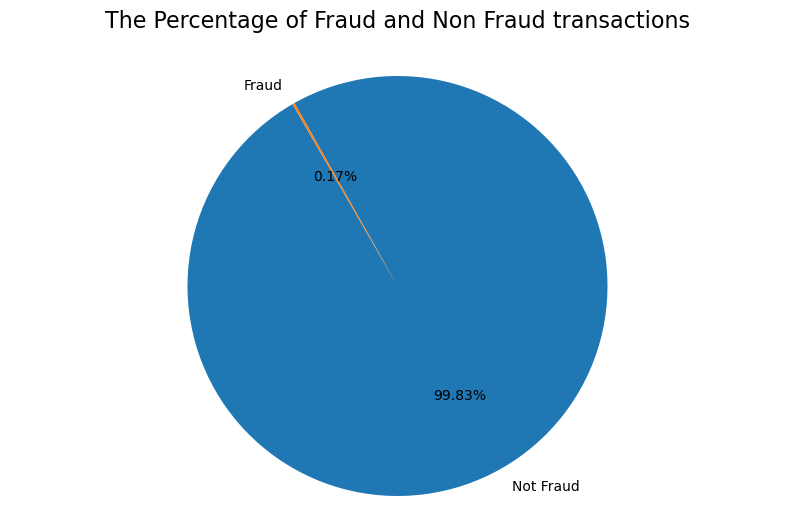

In [52]:
# Visualizing the amount of Fraud and Non Fraud transactions

## The percentage of Fraud and Non Fraud transactions chart

# Define the labels for the pie chart
labels = 'Not Fraud', 'Fraud'

# Calculate the count of Fraud and Non Fraud transactions in the dataset
sizes = [creditCFD.Class[creditCFD['Class']==0].count(), creditCFD.Class[creditCFD['Class']==1].count()]

# Create a new figure and axis for the pie chart
fig1, ax1 = plt.subplots(figsize=(10, 6))

# Plot the pie chart with the calculated sizes and labels
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=False, startangle=120)

# Set the axis equal to make the pie chart a perfect circle
ax1.axis('equal')

# Set the title of the pie chart with added distance (pad) between the title and the chart
title = "The Percentage of Fraud and Non Fraud transactions"
plt.title(title, size=16, pad=20)  # You can change the pad value to adjust the distance

# Show the pie chart
plt.show()


In [ ]:
# Countplot:
plt.figure()
sns.countplot(data = creditCFD, x = creditCFD.Class)
plt.xticks(np.arange(2), ['Non-Fraud', 'Fraud'])
plt.title('Class distribution: Non-Fraud vs Fraud')
plt.show();

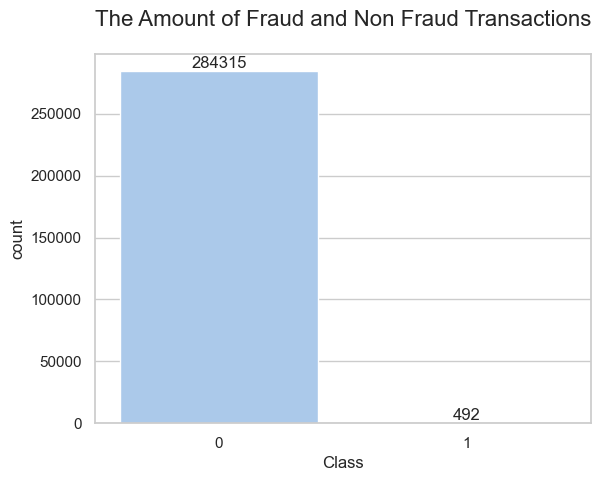

In [54]:
# Amount of Fraud and Non Fraud transactions plot

sns.set(style="whitegrid")

#Create the countplot
ax = sns.countplot(x='Class', data=creditCFD, order=[0, 1], label='Count', palette='pastel')

# Calculate the counts of E-signed and Not E-signed customers
counts = creditCFD['Class'].value_counts()

# Add text annotations for the counts
for i, count in enumerate(counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Set the title
title = "The Amount of Fraud and Non Fraud Transactions"
ax.set_title(title, size=16)
plt.title(title, size=16, pad=20)

# Show the plot
plt.show()

In [ ]:
#sns.catplot(creditCFD, "Time", "Amount", "Class")

sns.lineplot(data = creditCFD,
             x="Time",
             y="Class",
             hue = "Amount",
             palette = "muted")
plt.show()

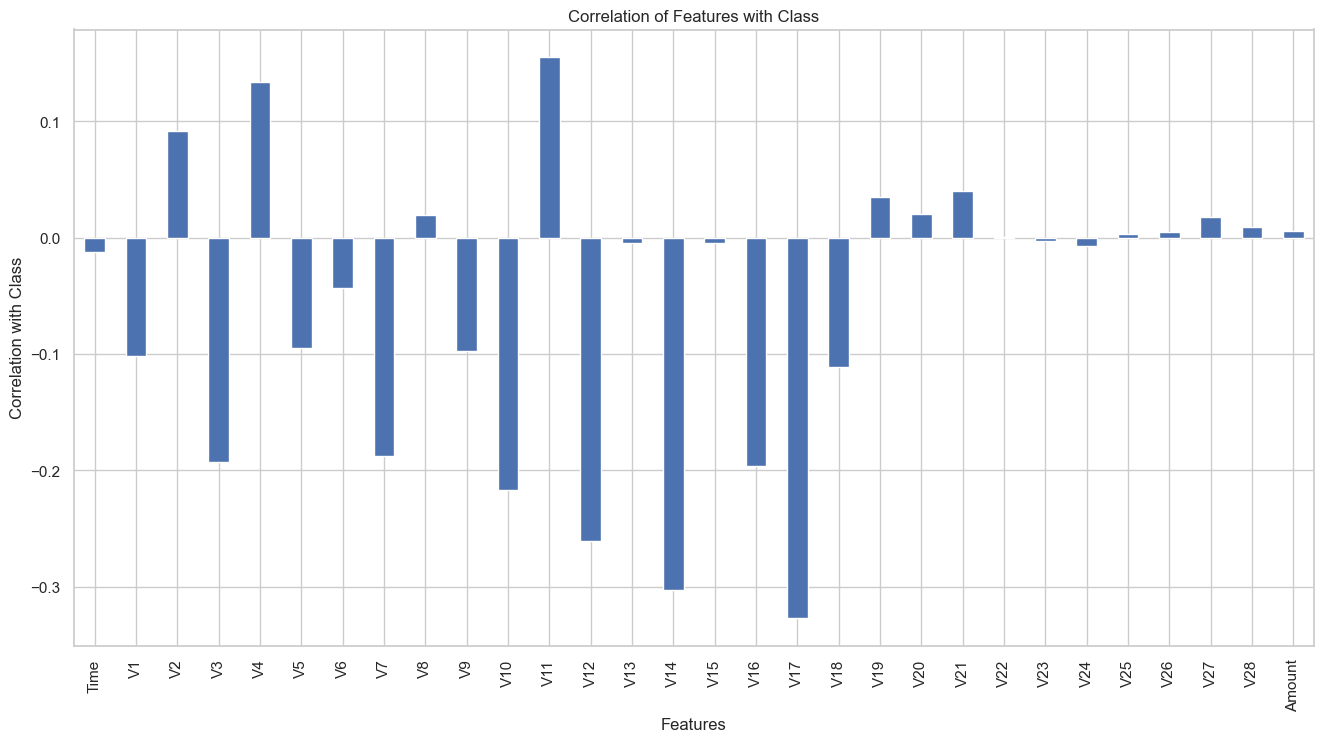

In [55]:
# Correlation Diagram

# Drop the 'Class' column from the original dataset and create a new DataFrame 'dataset_2'
creditCFD_new = creditCFD.drop(columns=['Class'])

# Calculate the correlation between each column in 'dataset_2' and the 'Class' column in the original dataset
correlation_with_class = creditCFD_new.corrwith(creditCFD['Class'])

# Create a bar plot to visualize the correlation values with the 'Class' column
# Set the size of the figure to 16 inches (width) by 8 inches (height)
# Show grid lines in the plot for better readability
correlation_with_class.plot.bar(figsize=(16, 8), grid=True)

# Set appropriate labels and titles for the plot
plt.xlabel("Features")  # Label for the x-axis (features)
plt.ylabel("Correlation with Class")  # Label for the y-axis (correlation values)
plt.title("Correlation of Features with Class")  # Set the title for the bar plot

# Show the plot
plt.show()

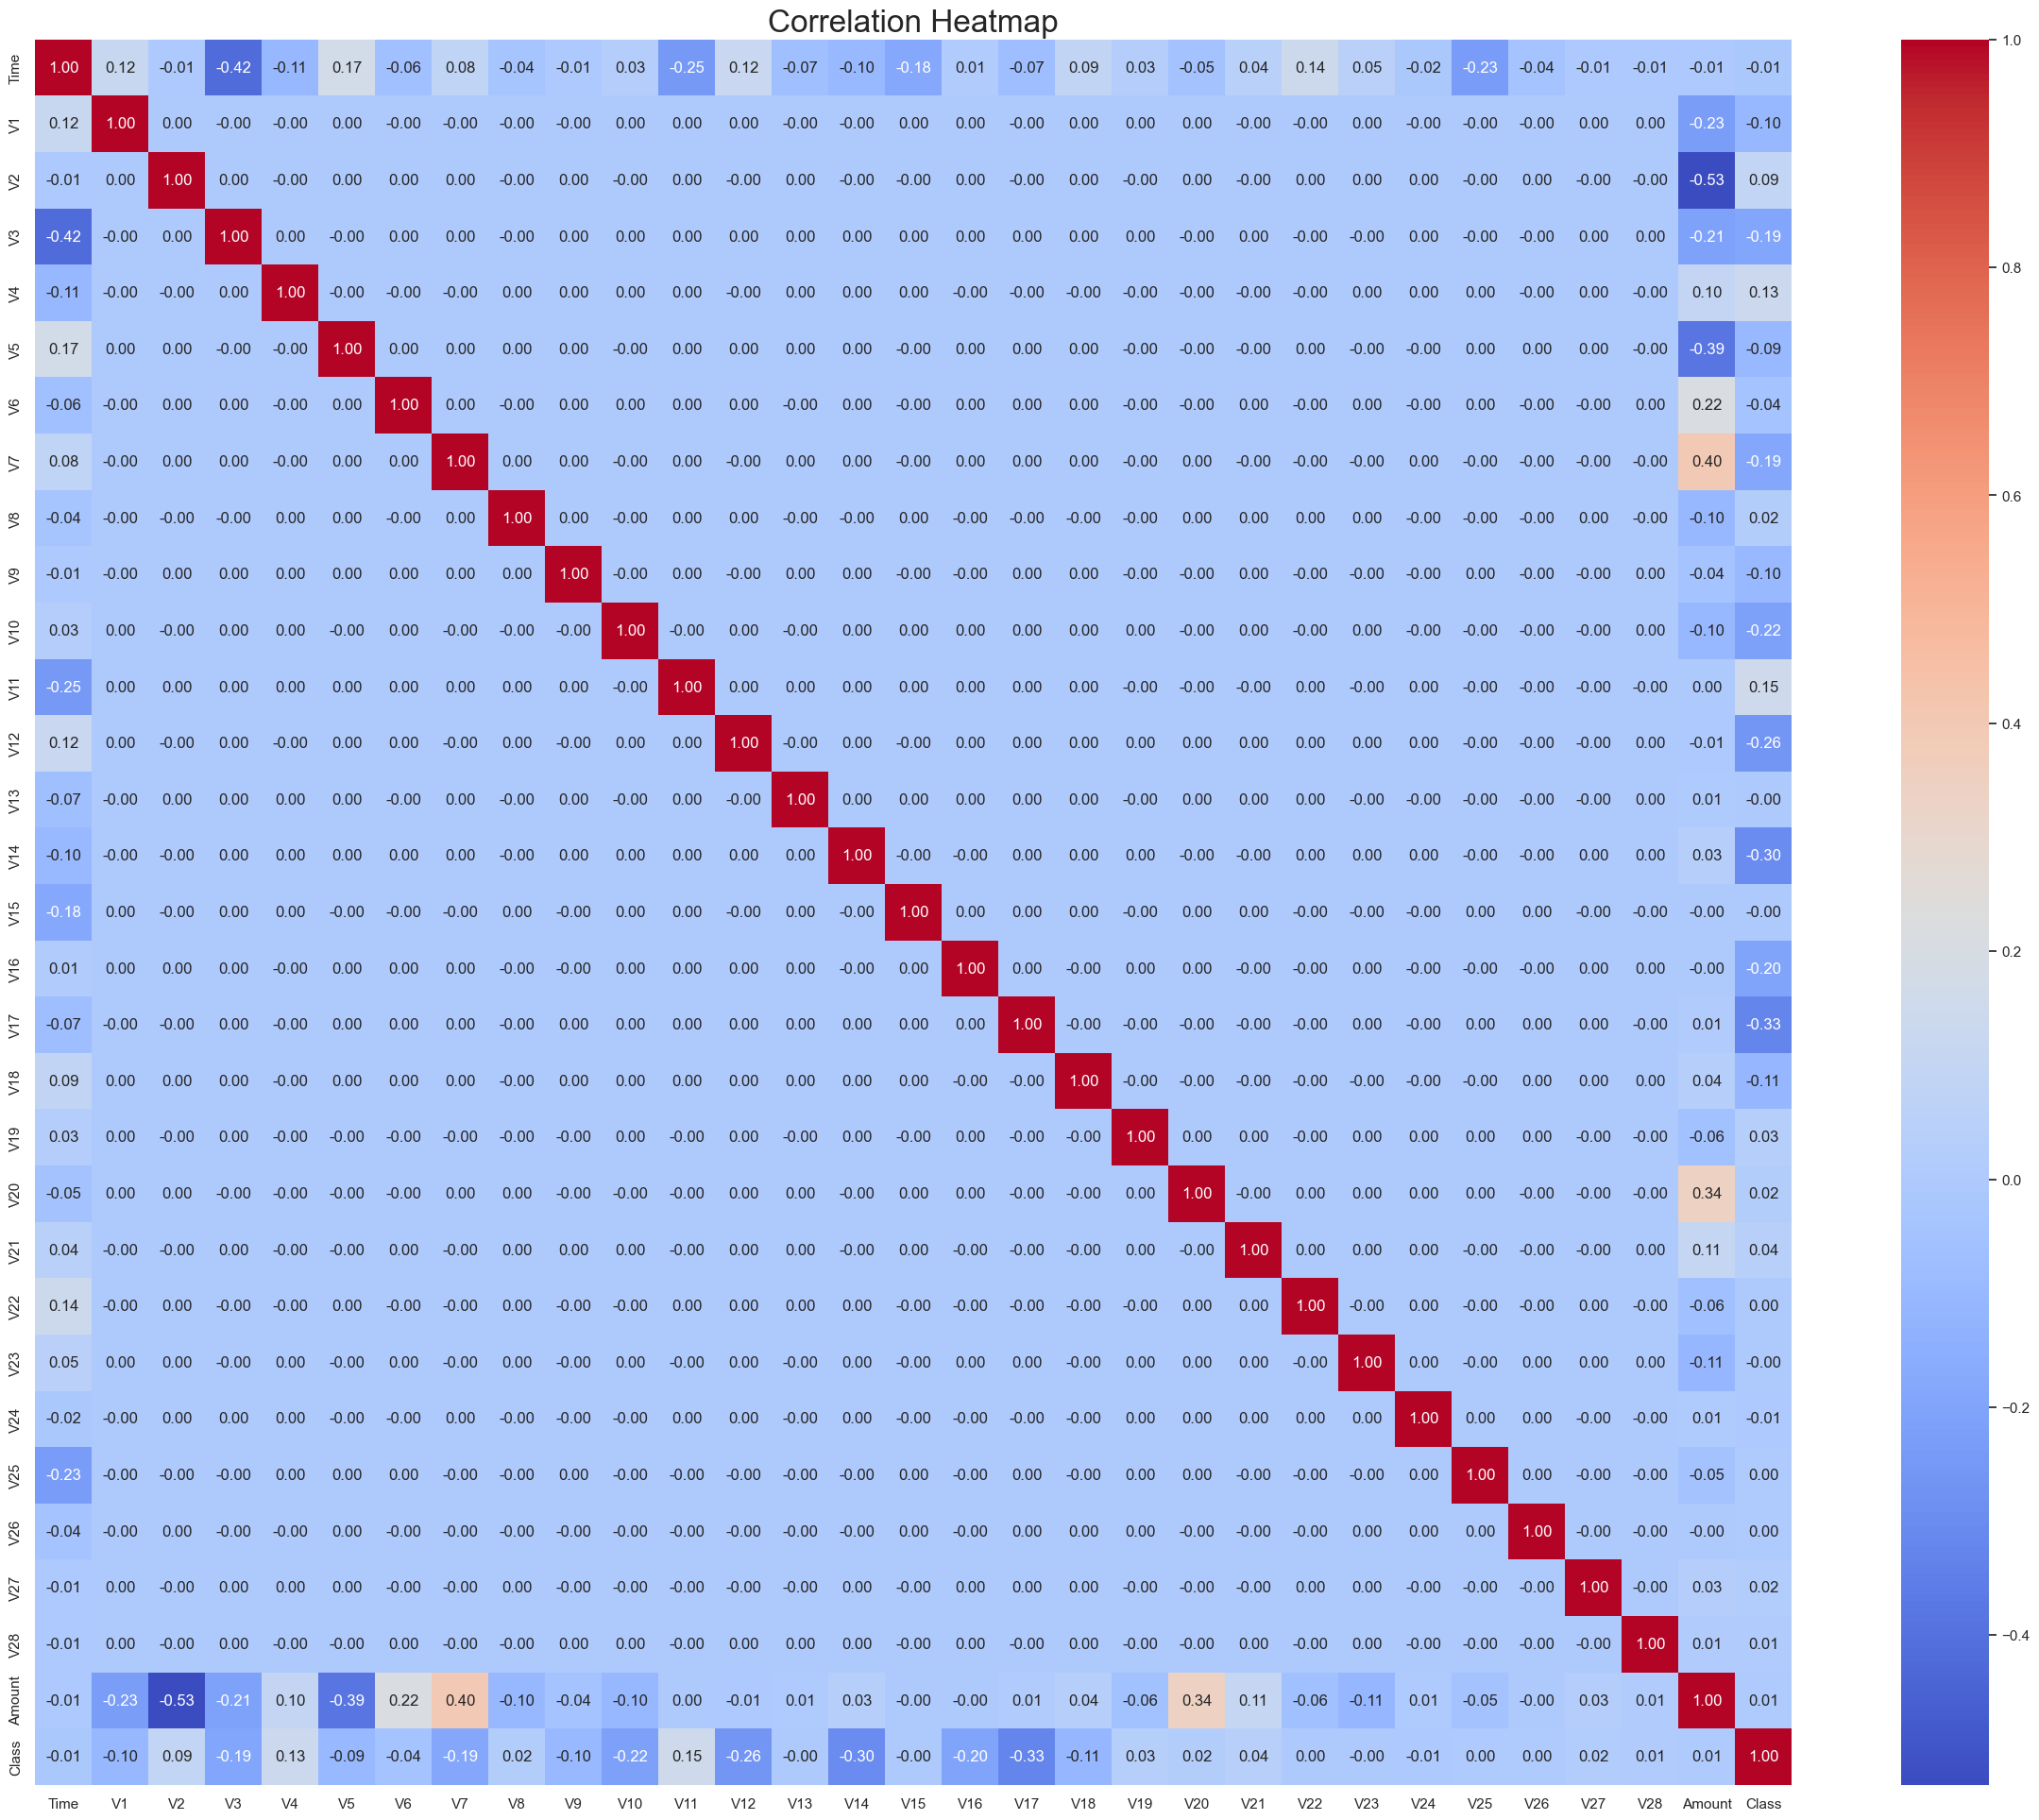

In [56]:
# Heatmap

# Calculate the correlation matrix for the dataset
corr = creditCFD.corr()

# Set the size of the heatmap figure
plt.figure(figsize=(30, 24))

# Create the heatmap using seaborn
# 'annot=True' displays the correlation values on the heatmap
# 'cmap='coolwarm'' sets the color map for the heatmap
# 'fmt='.2f'' sets the format of the displayed correlation values to have two decimal places
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

# Set the title for the heatmap
plt.title("Correlation Heatmap", fontsize=24)

# Show the heatmap
plt.show()

In [61]:
# Splitting the Train data and Test data

# Separate the input features (X) and the target variable (y)
x = creditCFD.drop(columns=['Class']) # X contains all columns except 'Class'
y = creditCFD['Class'] # y contains only the 'Class' column, which is the target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)


# Scaling the data:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Logistic Regression:

In [64]:
#Creating an instance of the logistic regression classifier
# Setting the random_state to ensure reproducibility of results

classifier_lr = LogisticRegression(random_state=0)

# Training the model and checking the fit:
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [91]:
# Making the prediction
y_pred = classifier_lr.predict(x_test)

# Calculate accuracy using the predicted and true target values (y_pred and y_test)
acc = accuracy_score(y_test, y_pred)

# Calculate F1 score using the predicted and true target values (y_pred and y_test)
f1 = f1_score(y_test, y_pred)

# Calculate precision score using the predicted and true target values (y_pred and y_test)
prec = precision_score(y_test, y_pred)

# Calculate recall score using the predicted and true target values (y_pred and y_test)
rec = recall_score(y_test, y_pred)

# Getting the results
lr_results = pd.DataFrame([['LogisticRegression', acc, f1, prec, rec]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])

lr_results

,Model,accuracy,f1,precision,recall
0,LogisticRegression,0.999192,0.735632,0.876712,0.633663


In [88]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [69]:
# Checking the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56852     9]
 [   37    64]]


## Random Forest Classifier

In [85]:
# Creating an instance of the RandomForestClassifier
# Setting the random_state to ensure reproducibility of results
classifier_rm = RandomForestClassifier(random_state=0)

# Training the model
classifier_rm.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [92]:
# Making the prediction
y_pred = classifier_rm.predict(x_test)

# Calculate accuracy using the predicted and true target values (y_pred and y_test)
acc = accuracy_score(y_test, y_pred)

# Calculate F1 score using the predicted and true target values (y_pred and y_test)
f1 = f1_score(y_test, y_pred)

# Calculate precision score using the predicted and true target values (y_pred and y_test)
prec = precision_score(y_test, y_pred)

# Calculate recall score using the predicted and true target values (y_pred and y_test)
rec = recall_score(y_test, y_pred)

# Getting the results
rm_results = pd.DataFrame([['RandomForest', acc, f1, prec, rec]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])

results = pd.concat([lr_results, rm_results], ignore_index=True)


results



,Model,accuracy,f1,precision,recall
0,LogisticRegression,0.999192,0.735632,0.876712,0.633663
1,RandomForest,0.999491,0.844920,0.918605,0.782178


In [87]:
print(y_pred)

[0 0 0 ... 0 0 0]


## Checking the predictions

In [94]:
creditCFD.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [95]:
# Creating the function for predicting the target based on the index we input:

def predict_single_observation(index, model, scaler):
    # Assuming 'x_train' is your original NumPy array with feature names
    # Define the feature names as a list excluding the target column 'Class'
    feature_names = creditCFD.columns.tolist()[:-1]

    # Create a DataFrame for the single observation with feature names
    single_obs_df = pd.DataFrame([creditCFD.loc[index, feature_names]])

    # Use the provided StandardScaler
    single_obs_scaled = scaler.transform(single_obs_df)

    # Predict using the transformed single observation
    prediction = model.predict(single_obs_scaled)
    return prediction[0]

In [98]:
# Example usage:
index_of_observation = 4   # Replace this with the index of the row you want to predict
prediction = predict_single_observation(index_of_observation, classifier_rm, sc)
print(prediction)

0


## This gave us the correct answer.

In [99]:
# Now it is better to select the cases with fraud results and check of we can predict them
# Selecting the rows with fradulent cases

selected_rows = creditCFD[creditCFD['Class'] == 1].head(5)
selected_rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [101]:
# Now check the predictions again:
index_of_observation = 6108   # Replace this with the index of the row you want to predict
prediction = predict_single_observation(index_of_observation, classifier_rm, sc)
print(prediction)

1


## The Random Forest Classifier gave us  test accuracy of nearly 99.94% and a perfect F1-Score with minimal overfitting.